# CCE3206 - Practical 2 - IIR system
# Graham Pellegrini 0352804L

## Tasks:
### 1. Create IIR Filter


In [14]:
import numpy as np

def filter(x):
    # Set y to have the same length and type as x
    y = np.zeros_like(x)
   
    # Initialize w(n-1) to 0
    w_prev = 0
   
    # Iterate over all input samples
    for n, x_n in enumerate(x):
        # Calculate the intermediate value w(n) 
        w = x_n + (0.6 * w_prev)
        # Calculate the output value y(n)
        y[n] = (0.2 * w) + (0.2 * w_prev)
        
        # Update w_prev for the next iteration
        w_prev = w
    # Return the output signal y after all iterations
    return y


This first-order IIR filter is defined by the difference equation:
𝑦(𝑛) = 0.6𝑦(𝑛 − 1) + 0.2𝑥(𝑛) + 0.2𝑥(𝑛 − 1)

Using intermediate variables w(n) and w(n-1), as seen in Figure 1, it can be rewritten as:
𝑦(𝑛) = 0.2𝑤(𝑛) + 0.2𝑤(𝑛 − 1)
where:
w(n) = x(n) + 0.6w(n-1)

Initially, w(n-1) = 0. The filter function takes an input signal x, creates an output signal y of the same length, and iterates over all input samples to calculate the intermediate and corresponding output values.

### 2.

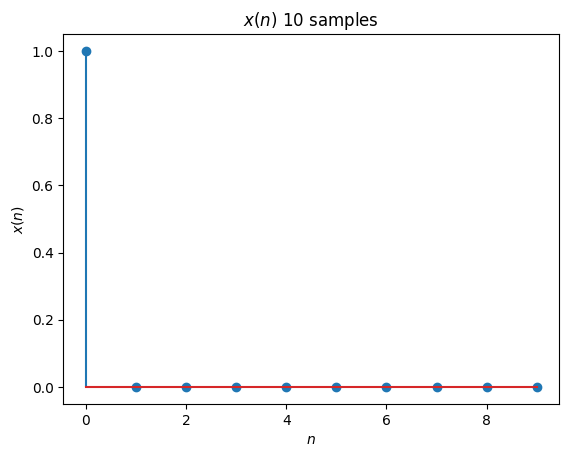

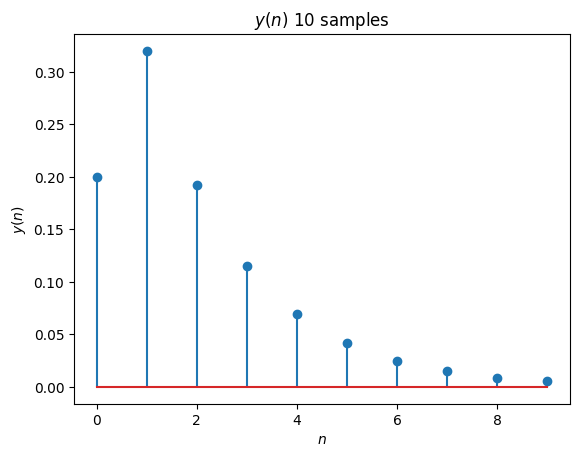

In [15]:
import matplotlib.pyplot as plt
# (a) Generate an input sequence x(n) = δ(n) for a length of 10 samples
x = np.zeros(10)
# Set the first sample to 1 for an impulse
x[0] = 1 

# (b) Produce an output sequence y(n) by passing the input sequence to the filter
y = filter(x)

# Plot the input sequence
fig, ax = plt.subplots()
n = np.arange(len(x))
ax.stem(n, x)
ax.set_xlabel('$n$')
ax.set_ylabel('$x(n)$')
plt.title('$x(n)$ 10 samples')
plt.show()

# (c) Plot the output
fig, ax = plt.subplots()
n = np.arange(len(y))
ax.stem(n, y)
ax.set_xlabel('$n$')
ax.set_ylabel('$y(n)$')
plt.title('$y(n)$ 10 samples')
plt.show()


The impulse response of the defined filter:

From the input signal plot, we can confirm that the impulse occurs at \( n=0 \) and the rest of the samples are zero.

The output signal plot shows the initial transient response of the filter at the beginning of the signal, followed by the exponential decay of the impulse response. The output signal does not reach the peak amplitude of the input signal because the impulse does not have enough time to fully propagate through the filter before the decay begins.

### 3

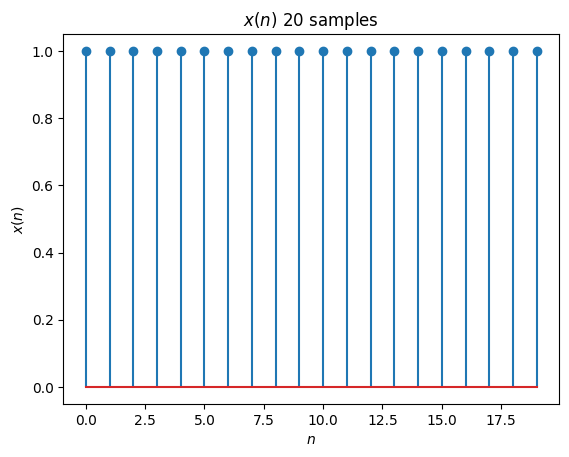

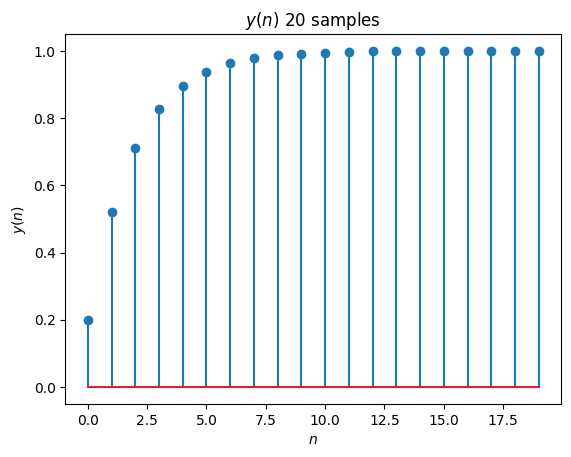

In [16]:

# Generating a unit step function instead of an impulse, with 20 samples x(n) = U(n)
x = np.ones(20)  

# Reproduce the output sequence y(n) by passing the unit step input sequence to the filter
y = filter(x)

# Plot the input sequence
fig, ax = plt.subplots()
n = np.arange(len(x))
ax.stem(n, x)
ax.set_xlabel('$n$')
ax.set_ylabel('$x(n)$')
plt.title('$x(n)$ 20 samples')
plt.show()

# Plot the output sequence
fig, ax = plt.subplots()
n = np.arange(len(y))
ax.stem(n, y)
ax.set_xlabel('$n$')
ax.set_ylabel('$y(n)$')
plt.title('$y(n)$ 20 samples')
plt.show()

The step input response of the filter:

The input plot does not show it, but naturally, the values before the step at \( x(0) \) are 0. The values after the step are clearly 1.

As expected, the output response of the filter is a ramp function. The output values are 0 before the step at \( x(0) \). After the step, they begin to increase linearly with a slope of 0.2 until they saturate at the input magnitude of 1.

### 4.

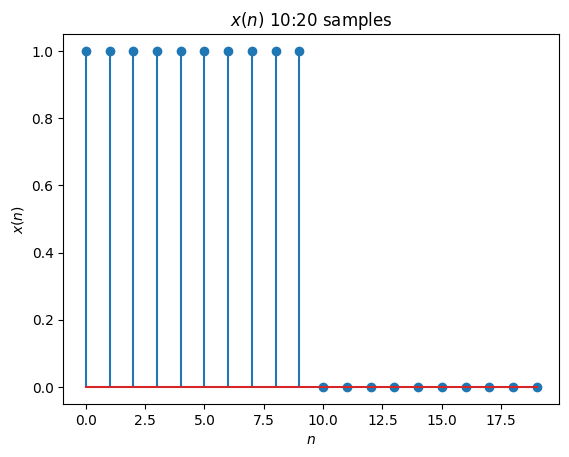

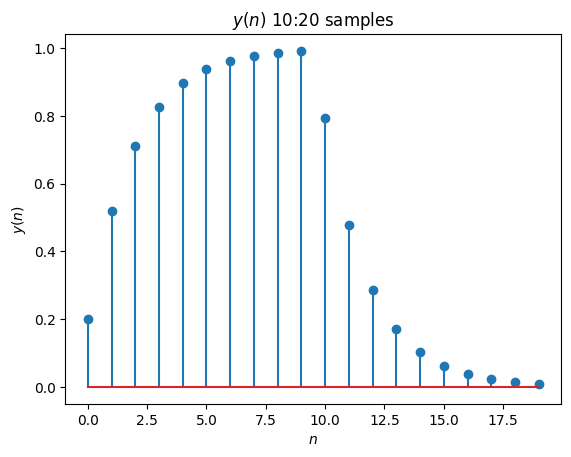

In [17]:

# Changing the input sequence to x(n) = U(n) - U(n - 10) for a length of 20 samples
x = np.ones(20)  
# Therefore x(0:10) = 1 and x(10:) = 0
x[10:] = 0

# Reproduce the output sequence y(n) 
y = filter(x)

# Plot the input sequence
fig, ax = plt.subplots()    
n = np.arange(len(x))
ax.stem(n, x)
ax.set_xlabel('$n$')
ax.set_ylabel('$x(n)$')
plt.title('$x(n)$ 10:20 samples')
plt.show()

# Plot the output
fig, ax = plt.subplots()
n = np.arange(len(y))
ax.stem(n, y)
ax.set_xlabel('$n$')
ax.set_ylabel('$y(n)$')
plt.title('$y(n)$ 10:20 samples')
plt.show()

The input signal \( x(n) \) is a range-limited unit step function. The plot clearly shows that \( x(n) \) is 1 for \( 0 \leq n < 10 \) and 0 for \( n \geq 10 \).

The output response \( y(n) \) will begin to rise at \( n = 0 \) and try to reach the steady state of 1 but will begin to decay exponentially at \( n = 10 \).

### 5.

44100


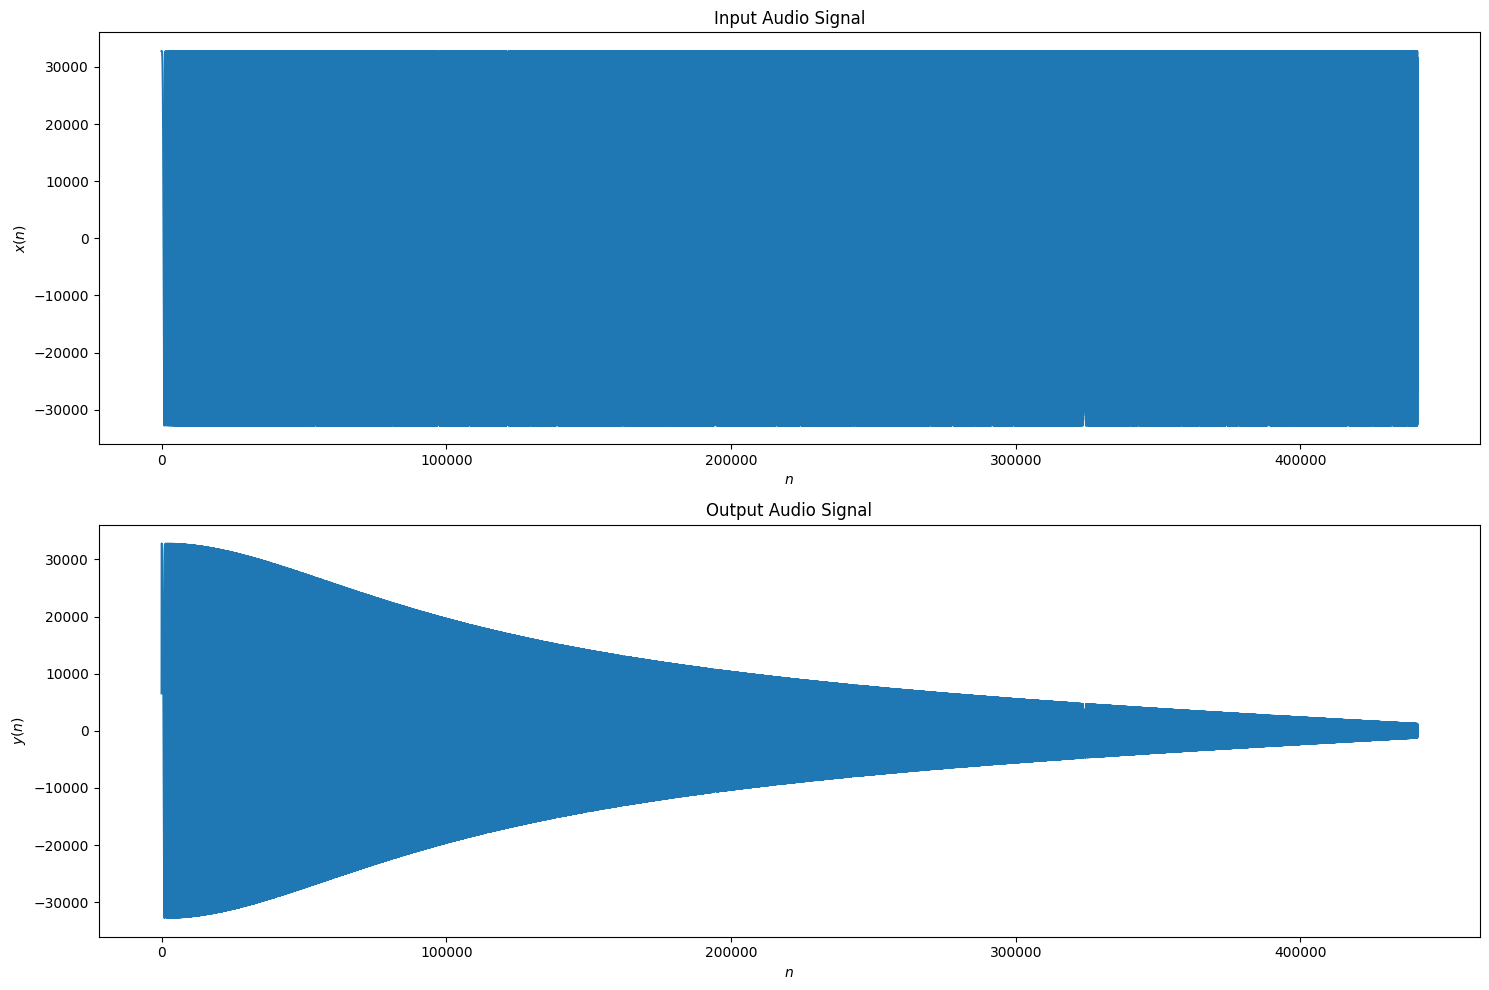

In [18]:
# (a) Read the input sequence from the file tones.wav
from scipy.io import wavfile
# scipy.io's wavfile.read() function gives us the sampling frequency and the audio signal samples
[fs, x] = wavfile.read('files/tones.wav')
print(fs)

# (b) Filter the input audio using the filter from Task 1
y = filter(x)

# (c) Save the output
wavfile.write('files/output_tones.wav', fs, y)

# (d) Plot the input and output waveforms for comparison
fig, ax = plt.subplots(2, 1, figsize=(15, 10))

n = np.arange(len(x))
ax[0].plot(n, x)
ax[0].set_title('Input Audio Signal')
ax[0].set_xlabel('$n$')
ax[0].set_ylabel('$x(n)$')

n = np.arange(len(y))
ax[1].plot(n, y)
ax[1].set_title('Output Audio Signal')
ax[1].set_xlabel('$n$')
ax[1].set_ylabel('$y(n)$')

plt.tight_layout()
plt.show()


The input audio signal is an increasing frequency tone, which starts at a low frequency and increases to a high frequency. The amplitude remains constant throughout the signal, so the plot of the input audio signal shows a constant amplitude with increasing frequency. With the plot scale, it appears as a box shape.

When passed through the filter, the result is a signal with decreasing amplitude as the frequency increases. The plot of the output audio signal shows a decreasing amplitude with increasing frequency, resembling a triangle shape.

Note that the sampling rate and the number of samples in the signals are the same, so with each sample, the frequency increases.

### 6.

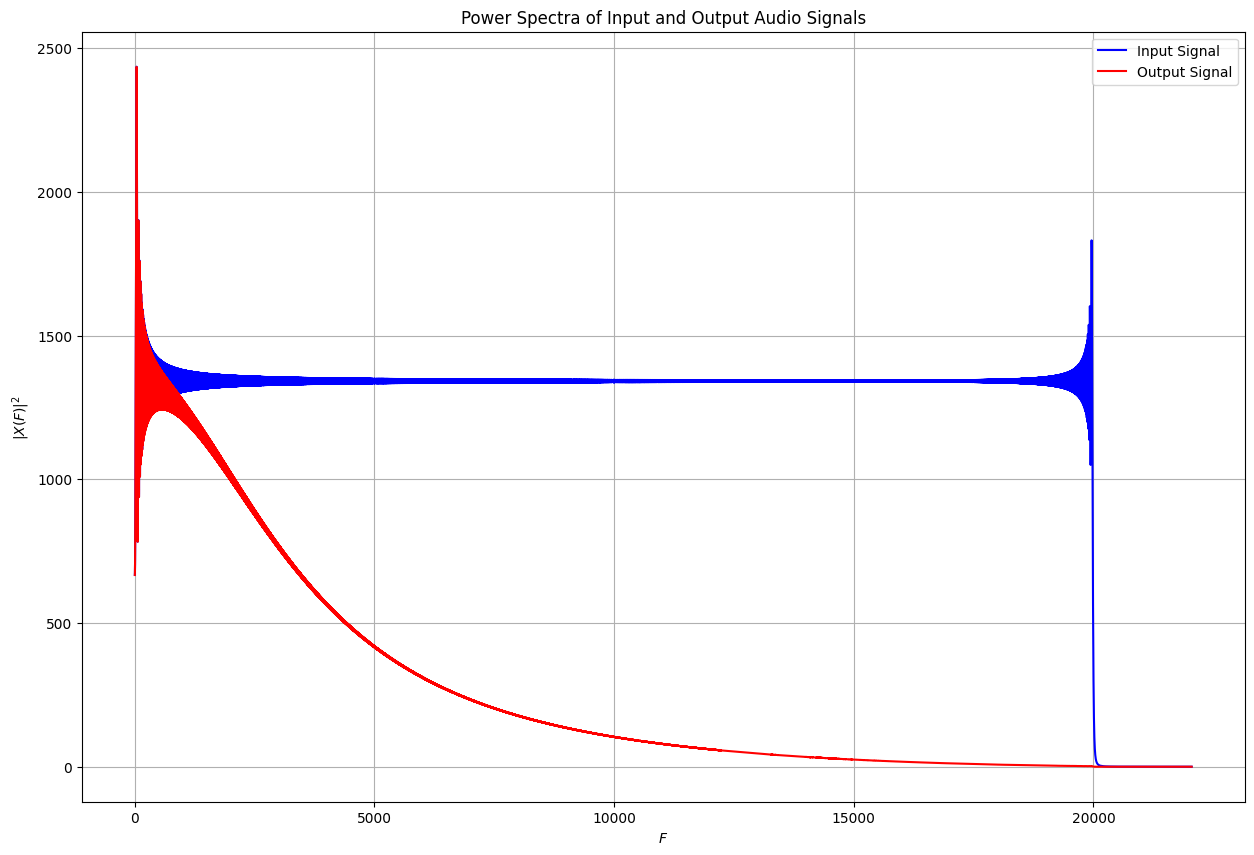

In [19]:
from scipy.fft import fft, fftfreq

# Compute the FFT and power spectrum of the input signal
X = fft(x) / len(x)
X = X[:len(X) // 2]
Xp = np.abs(X) ** 2

# Generate the frequency axis based on the sampling frequency
F = fftfreq(len(x), 1 / fs)
F = F[:len(F) // 2]

# Compute the FFT and power spectrum of the output signal
Y = fft(y) / len(y)
Y = Y[:len(Y) // 2]
Yp = np.abs(Y) ** 2

# Plot the power spectra of both signals on the same graph to compare
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(F, Xp, label='Input Signal', color='blue')
ax.plot(F, Yp, label='Output Signal', color='red')
ax.set_xlabel('$F$')
ax.set_ylabel('$|X(F)|^2$')
ax.grid(True)
ax.legend()
plt.title('Power Spectra of Input and Output Audio Signals')
plt.show()

The input signal is known to have constant amplitude across increasing frequencies. Therefore, the power spectrum of the input signal should be flat. However, we observe peaks at the lower and higher frequency bounds. This is due to the windowing effect of the FFT algorithm.

The output signal, on the other hand, has decreased amplitude across increasing frequencies. Therefore, we expect the power spectrum of the output signal to decrease exponentially to 0 as the frequency increases. This is what we observe in the plot above. Note the same windowing effect on the output with the FFT, but it is only seen at the low frequencies since the high ones have 0 power.

### 7.

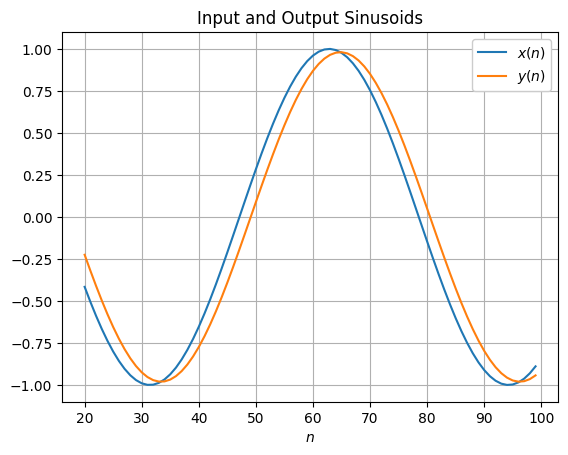

Gain of the filter: 0.9805059752083243
Phase shift of the filter: 0.2 rad


In [20]:

# Define ω0 = 0.1 rad/sample
w0 = 0.1
# Give a length for the input signal
L = 100  
# Initialize the input sequence n
n = np.arange(L)
# Generate a sinusoidal input signal x(n) = cos(nω0)
x = np.cos(n * w0)

# Filter the sinusoid input signal to produce the output signal
y = filter(x)

# Remove the transient response from the output
y = y[20:]
# Remove the respective samples from the sequence and input
n = n[20:]
x = x[20:]

# Plot the input and output on the same axis
fig, ax = plt.subplots()
ax.plot(n, x, label='$x(n)$')
ax.plot(n, y, label='$y(n)$')
ax.set_xlabel('$n$')
ax.legend(loc='best', framealpha=1)
ax.grid(True)
plt.title('Input and Output Sinusoids')
plt.show()

# Get the maximum absolute value of the input and output signals
x_max = np.max(np.abs(x))
y_max = np.max(np.abs(y))

# Calculate the gain of the filter by dividing the maximum output by the maximum input
gain = y_max / x_max
print(f'Gain of the filter: {gain}')


# Define the zero crossings function
def find_zc(signal):
    # Find the indices where the signal changes sign
    zero_crossings = np.where(np.diff(np.sign(signal)))[0]
    # Return the indices
    return zero_crossings

# Find the zero crossings of the input and output signals
zc_x = find_zc(x)
zc_y = find_zc(y)

# Make sure the zero crossings are the same length
min_len = min(len(zc_x), len(zc_y))
zc_x = zc_x[:min_len]
zc_y = zc_y[:min_len]

# Take the average of the differences between the zero crossings
delay_samples = np.mean(zc_y - zc_x)

# Convert the delay to radians by multiplying by the angular frequency
phase_shift = delay_samples * w0
print(f'Phase shift of the filter: {phase_shift} rad')

In the plot, we can see two sinusoidal signals for the input and output. We can visually note that the peak of the output is smaller than the input and is delayed by a fractional period.

The transient response is removed from the output signal by discarding the first 20 samples. This was determined by observing the initial transient response in the plot and overestimating the number of samples to remove, ensuring the transient response is completely eliminated.

The gain of the filter is calculated by dividing the maximum output by the maximum input. The gain of the filter was found to be 0.98, indicating that the output is slightly dampened compared to the input.

The phase shift of the filter is calculated using a zero-crossing method. The zero crossings do not include the transient response. The average difference between the zero crossings is taken and multiplied by the angular frequency to obtain the phase shift. The phase shift of the filter was found to be 0.2 rad, which is equivalent to 1/5 of a period.

### 8.

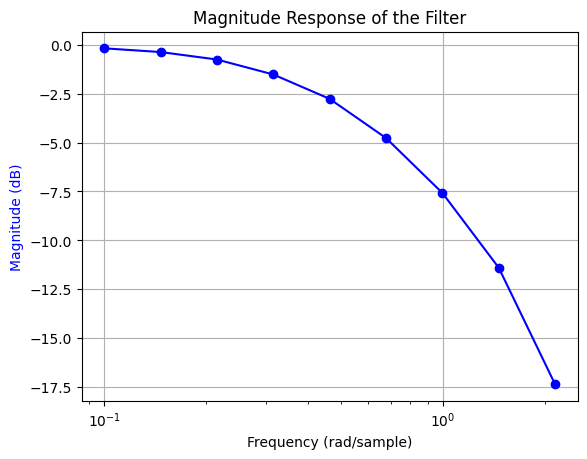

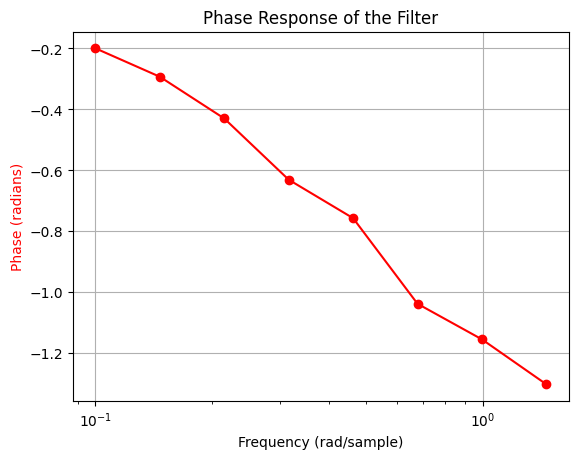

In [21]:
# Generating 10 log spaced angular frequencies in the range[0.1 to π]
w = np.geomspace(0.1, np.pi, 10)
# Remove the last element to avoid π
w= w[:-1]
# We note that pi will give a magnitude of log(0) = -inf and a phase of 0 which will ruin our plots since we know their theoretical values

# Use the same length for all sinusoids
L = 100  
# Initialize the gains and phases lists
gains = []
phases = []

# Iterate over all the frequencies
for w0 in w:\
    # Repeat the same steps as before

    # Generate the input signal x(n) = cos(nω0)
    n = np.arange(L)
    x = np.cos(n * w0)

    # Filter the input signal to produce the output signal
    y = filter(x)

    # Remove the transient responses
    y = y[20:]
    x = x[20:]
    n = n[20:]
    
    # Determine the gain of the filter
    x_max = np.max(np.abs(x))
    y_max = np.max(np.abs(y))
    gain = y_max / x_max
    
    # Determine the phase shift of the filter using zero crossings
    zc_x = find_zc(x)
    zc_y = find_zc(y)

    # Make sure the zero crossings are the same length
    min_len = min(len(zc_x), len(zc_y))
    zc_x = zc_x[:min_len]
    zc_y = zc_y[:min_len]

    # Make sure there are zero crossings
    if len(zc_x) > 0 and len(zc_y) > 0:
        # Calculate the delay in samples
        delay_samples = np.mean(zc_y - zc_x)
        
        # Convert the delay to radians
        phase_shift = -delay_samples * w0
        
        # Append the gain in dB format
        gains.append(20 * np.log10(gain))
        # Append the phase shift in radians
        phases.append(phase_shift)

# Plot the magnitude response
fig, ax1 = plt.subplots()
ax1.semilogx(w, gains, 'b-o')
ax1.set_xlabel('Frequency (rad/sample)')
ax1.set_ylabel('Magnitude (dB)', color='b')
ax1.grid(True)
plt.title('Magnitude Response of the Filter')
plt.show()

# Plot the phase response
fig, ax2 = plt.subplots()
ax2.semilogx(w[:-1], phases[:-1], 'r-o')
ax2.set_xlabel('Frequency (rad/sample)')
ax2.set_ylabel('Phase (radians)', color='r')
ax2.grid(True)
plt.title('Phase Response of the Filter')
plt.show()
